# My Resume

## CV Project

### Background

* This project involves trying to make sense of a dataset from ILRI in Kenya which has 120,000 geotagged cell phone pictures which are associated with survey data.
* The survey asked pastoralists to rate the carrying capacity of the land by asking how many cows could be fed by the available forage within 20 steps in every direction for one day.
* The survey then asked participants whether there were grass, shrubs or trees in the area and whether they had green, brown or no leaves. It also asked whether there were animals grazing, and how far away the nearest source of water was.

### Issues

* There are a number of issues with the data collected and the survey design. The images are poor quality and seem to have been processed somehow, although it's not clear how. Colors seem to be blended together in a strange way, as if the images have been compressed.
* Some of the pictures are of people, villages, or people holding up printed pictures. Some pictures are clearly geotagged wrong, indicating that they may have been uploaded from a different place than where they were taken.
* The way that herders were asked about carrying capacity is problematic. Participants were asked about an area within a 20 step radius, but the pictures only show one direction which may or may not be consistent with the carrying capacity rating.
* Some of the survey data is unintelligible. For example, there are certain rows which have a value 3 3 1 1 2 2 in a column where the possible values are 1 2 and 3. The survey app is based on OpenDataKit Collect, and it seems like these responses mean that someone checked and unchecked an option, resulting in 2 clicks. For now, I have just discarded these rows for the few experiments I have run, because there are not very many instances.


### Methodology

The goals for the outcome of this project are: 

1. Find the highest quality data and identify the indicators of what high quality data is like in this context.
2. Use computer vision models and other forms of analysis to identify the best ways to infer carrying capacity from survey data and images
3. Use what I have learned from the process to come up with suggestions as to how future experiments might be designed more effectively.


* To start I created an efficient way to preview a few random images from whatever subset of the data I select without downloading all 120,000.
* These images can be previewed on a map, along with their carrying capacity score and the corresponding NDVI from MODIS data on Google Earth Engine. I have to use my brother's account to access this since I haven't been accepted into Google Earth Engine yet. This is something I will go back to once I have more meaningful results from the dataset.
* I will ultimately use this survey data along with MODIS satellite data to try to find techniques which get close to the results of the NDVI (Normalized Difference Vegetation Index).
* The NDVI works by measuring the ratio of visible light(0.4-0.7 $\mu$m), which is strongly absorbed by chlorophyl for photosynthesis, vs near infrared light (0.7-1.1 $\mu$m), which is strongly reflected by the cell structure of leaves. 

$$NDVI = \frac{NIR - Red}{NIR + Red}$$

* When researchers first noticed the data quality issues, they hired mechanical turks to re-rate the carrying capacity of the land based on images. I don't know much about the details of this, but I haven't used any of this data because it doesn't seem to have helped clarify anything.

### Experiments

* Initially, I tried just running tensorflow with imagenet-v3 to see what would happen if we attempted to predict the column CarryingCapacity directly. Unsuprisingly, this didn't work at all. We then tried something slightly more realistic, recognizing trees using inception, which worked just as badly. 
* To improve the performance of models, the data needs to be cleaned and organized more and the model needs to be designed to solve this specific problem rather than attempting to solve it with a massive pretrained network.
* At first, I attempted to get these same tensorflow models to work on smaller, processed versions of the dataset. I tried sobel edge detection and color quantization using k-means to create simplified versions of 10,000 of the images, and then tried the same thing on tensorflow. The results were a bit better, but still not very meaningful.
* In addition, I experimented with measuring the red, green and blue levels of each image, the ratios between these, and simplifying the image by making the dominant colors more prominent. This method didn't work at all, because much of the vegetation in the images is in the shade and much more blue than green. In addition, brown or dead vegetation tends to blend into the plants, and green vegetation tends to blend into the sky due to blue shadows.

* I created subsets of the data based on seemingly consistent and inconsistent answers to survey questions. I created a 'score' for answers which suggest higher carrying capacity, and another score which is for variables which suggest lower carrying capacity. for example green grass and dense grass, high carrying capacity and lots of animals, etc. Images with inconsistent tags do turn out to be more likely junk data, but most images have some "negative" and some "positive" indicators, meaning that this is only good for identifying some certain bad images. I created a 3d visualization to show that there is no clear pattern to these scores, except that very few images score high on positive and negative indicators simultaneously.
* Most recently, I've started trying with these cleaned up subsets of the data to run randomforest classifiers and then inspect which variables most impact carryingcapacity. This has given me more information than any of the other experiments so far, so I'm looking forward to go down this path by trying different algorithms and other ways to use the survey data to infer what is in the pictures or what the satellite says.

## Cyber Insurance Presentation

1. People need to do the cheapest and easiest thing first because many attorneys and small business owners have limited time or desire to learn about cybersecurity. The simplest step to greater security is awareness of policies, data, threats, devices, and consequences.
2. GDPR and the California Consumer Privacy Act are coming, and what this means
3. Cyberinsurance and how to shop for it
4. Further resources, checklists and where to go if you need more help.

### Cheapest and Easiest ways to Increase Cybersecurity

#### Social Engineering Awareness
Its very difficult to be effective at teaching people not to fall for it - social engineering can be very good

#### Audit Your Data
* What personal data do you have? (include paper and digital)   
* Where is it sent and shared?    
* Where is it stored?    
* How is it processed? 
* Who knows how it is processed?
* How is it collected?

#### Get/Configure a Firewall

Ensure it is not using default credentials or it is useless. 
Block pings unless you have a reason not to.
Assign specific IPs to specific MAC addresses on your internal network so you it is easier to read and interpret logs

#### Keep Firmware and Software Updated

On all network devices - if it is not important enough to be updated it should not be connected to the network.

#### Check your open ports

This is typically an attacker's first step - enumerate IP addresses and run scans on them with nmap, masscan, nessus, nikto, etc.

#### Use VLANS to segment your internal network

This is an effective and simple way to implement the principle that all network users should have access only to the resources which they need.

#### Use an IPS or IDS

Sometimes included in UTM (Unified Threat Management) devices, an IPS will look for anomalies and attempt to identify malicious activities. 

#### Use a WAF

A Web Application Firewall is a tool which can help you protect yourself if you host applications. 

#### Use a VPN

Workers can log into a VPN to protect against threats of connecting from risky mobile environments and to allow remote workers access to the network from a distance.


### GDPR and California Consumer Privacy Act of 2018

#### GDPR Summary

Infingements related to obligations of controller and processor are subject to fines of up to 10M Euros or 2% of worldwide annual turnover, whichever is higher.

Infringements regarding basic principles for processing, data-subject rights, transfers of personal data, or noncompliance are subject to fines of up to 20M Euros or 4% of worldwide annual turnover, whichever is higher.

For the consumer, businesses must:
* Demonstrate Compliance with GDPR
* Get parental consent for processing personal data of children under the age of 16
* Have defined data controllers and data processors
* Implement Privacy by Design
* Processors are only allowed to apply predetermined, written instructions to data
* Processors and Controllers must have clear arrangements as to who is responsible for what
* Controllers must keep records of all data processing
* Controllers and processors are responsible for security, and if there is a breach, data subject must be notified
* Data subject has right to information about processings
* Data subject has the right to be forgotten (business must delete personal data)
* Data subject has the right to export data in such a way that it can be brought to a different organization
* Data subject can request postponement or stopping of data being processed, unless controller demonstrates 'compelling legitimate grounds' for processing - however if the data is processed for direct-marketing, data subjects can object at any time.
* Data subject can object to automated decision making. For example, they can choose to opt out of a decision if it involves the data subject being profiled automatically. 
* Controllers and processors shall designate a data protection officer whose core activities consist of regular and systematic monitoring of personal data - DPO shall act indepndently of controllers and processors and report directly to the highest level of management. 
* Communicate data breach to data subject without undue delay if the data breach is likely to result in high risk to rights and freedoms of individuals

For the supervisory authority, businesses must:
* Notify of data breaches
* Complete data protection impact assessments
* Consult supervisory authority prior to processing
* Assign a data protection officer

Supervisory authority may:
* Monitor and enforce compliance
* Require information for investigations
* Issue warnings and reprimands
* Order compliance with data subject requests
* Impose limiations or bans on processings

#### California Consumer Privacy Act Summary

1798.100 - Consumer has the right to request what personal information a business has collected about them - a business that has collected this information is required to disclose it to the consumer.

1798.101 - Consumer has the right to request information on what data has been sold to third parties for business purposes. This includes information about what type of personal information and to whom it has been sold

1798.102 - Consumer has the right to say that a company is not allowed to sell their personal information. The business must provide notice to customers that their information will be sold and that consumers have the right to opt out.

1798.103 - A business may not discriminate against consumers because they have requested information or directed the business not to sell their information. Discrimination includes denying goods or services, charging different prices, providing lower quality goods or services, or suggesting that the consumer will receive different prices or lower quality goods.

1798.104 - There must be two or more designated methods for submitting requests for information required to be disclosed - minimum includes a web address and toll-free phone number. Information must be provided to the consumer within 45 days of a verifiable request.

1798.105 - There must be a "Do Not Sell My Personal Information" Link on the business's homepage - the company can not require consumer to set up an account to direct them not to sell their personal information. (and some more details)

1798.106 - Defines Biometric Data, Business, Business purpose, clear and conspicuous, commercial purposes, consumer, de-identified, designated methods for submitting requests. homepage, infer, inference, person, personal information, probabilistic identifier, psychometric information, publicly available, sell, selling, sale, sold, service, services, third party, unique identifier, verifiable request

1798.107 - Exemptions: obligations shall not restrict a business's ability to comply with federal, state, or local laws. Obligations shall not apply where compliance violates evidentiary privelege under california law. The act does not apply to protected health information which is collected by a covered entity governed by medical privacy and security rules issued by Federal Department of Health and Human Services, Parts 160 and 164 of title 45 established pursuant to HIPAA (1996). The act does not apply to sale of personal information if it is to be reported in or used to generate a consumer report as defined by Fair Credit Reporting Act (subdivision d of Section 1681(a) of Title 15 of the US Code.

1798.108 - Consumers who have suffered a violation of the act can bring statuatory damaged. Consumers get at least \$1000 and up to \$3000, or actual damages - whichever is more.

1798.109 - A person who intentionally violates the act may be liable of civil penalty up to \$7500 for each violation.

1798.110 - A special account called the Consumer Privacy fund is continuously appropriated to offset costs incurred by state courts in connection with actions brought to enforce the act.

1798.111 - Whistleblowers can disclose that a person or business has violated the act and ask the Attorney General to commence civil action. If AG doesnt file suit within 90 days, the person may proceed to file a civil action. (does the whistleblower get 15$\%$ of the civil penalties??)

1798.112 - A business that suffers a security breach is liable for violations of the act.

1798.113 - Act is intended to futher constitutional right of privacy, including California Internet Privacy Act, California Shine the Light Act, etc. provisions apply to all types of data, and law should be construed to harmonize and afford greatest protection for the right of privacy.

1798.114 - Cities, counties, municipalities, etc are allowed to put whatever restrictions and requirements they want on businesses which collect and sell consumers' personal information.

1798.115 - details....

### Shopping for Cyber Insurance

### More Resources

## Evolve/UCAN Chicago



## Additional Freelance Work

## SIC

## Evolve

## College

# Questions for CyberCube

1. What type of role exactly would this be? Cyber, Data, Risk, or a combination?

2. What should I study for the next interview?

3. Can I ask you some questions I had for this upcoming presentation? Would you prefer to do that a different time?

4. Where does an organization's security posture come in to making Insurance decisions about the client?

Questions from the At-Bay Calculator

Customer & Employee Records or just Employee
* How many people were affected?
* What types of records? PII? Credit Card? Health?
* How were records breached? Error, Leak, Device Theft, Hack
* Do you store the mailing addresses for breached records?
* Have you publicly disclosed another breach in the last 24 months?
* How would you estimate the level of complexity of your network?
* How big of a news story would this breach be? no news, regional news, national news
* How would you estimate your security controls compared to industry best practices? Average, above, or below
* Are you based out of California?

Costs:
* Breach Coach
* Forensics
* Crisis Management
* Notification
* Call Center
* Credit Monitoring
* PCI Fines and Assessments
* Regulatory Fines and Defense
* Class Action Settlements and Defense

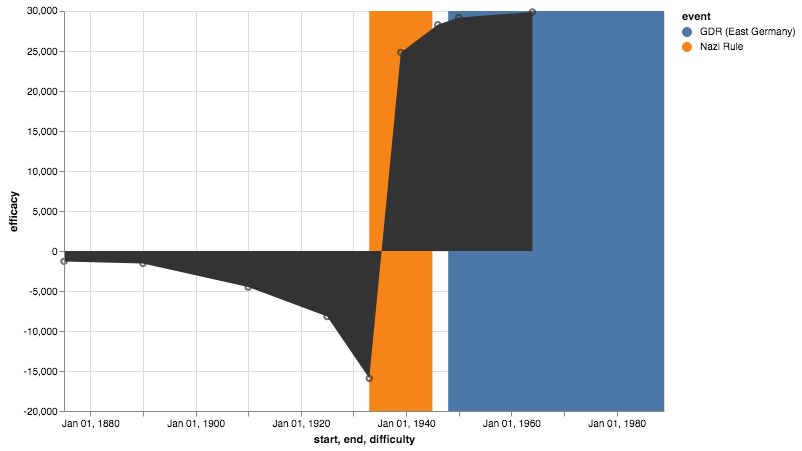

In [31]:
import altair as alt

source = [
      {"difficulty": "1875", "efficacy": -1309},
      {"difficulty": "1890", "efficacy": -1558},
      {"difficulty": "1910", "efficacy": -4512},
      {"difficulty": "1925", "efficacy": -8180},
      {"difficulty": "1933", "efficacy": -15915},
      {"difficulty": "1939", "efficacy": 24824},
      {"difficulty": "1946", "efficacy": 28275},
      {"difficulty": "1950", "efficacy": 29189},
      {"difficulty": "1964", "efficacy": 29881}
    ]

source2 = [{
            "start": "1933",
            "end": "1945",
            "event": "Nazi Rule"
          },
          {
            "start": "1948",
            "end": "1989",
            "event": "GDR (East Germany)"
          }]


source = alt.pd.DataFrame(source)
source2 = alt.pd.DataFrame(source2)


line = alt.Chart(source).mark_area(color='#333', baseline="middle").encode(
    alt.X('difficulty:T', axis=alt.Axis()),
    y='efficacy'
).properties(
    width=600,
    height=400
)

point = line.mark_point(color='#333')

rect = alt.Chart(source2).mark_rect().encode(
    x='start:T',
    x2='end:T',
    color='event:N'
)

chart = rect + line + point

chart.configure(background = "white")
